# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import statsmodels.api as sm
import numpy as np
from scipy.stats import iqr

da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
da.DMDMARTL.value_counts()

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

In [3]:
print(da.DMDMARTL.value_counts().sum())
print(2780 + 1004 + 579 + 527 + 296 + 186 + 2)
print(da.shape)

5474
5374
(5735, 28)


In [4]:
pd.isnull(da.DMDMARTL).sum()

261

In [5]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 
                                       6: "Living with partner",77: "Refused"})
da.DMDMARTLx.value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [6]:
x = da.DMDMARTLx.value_counts()  # x is just a name to hold this value temporarily
x / x.sum()

Married                0.507855
Never married          0.183412
Divorced               0.105773
Living with partner    0.096273
Widowed                0.072342
Separated              0.033979
Refused                0.000365
Name: DMDMARTLx, dtype: float64

In [7]:
da["DMDMARTLx"] = da.DMDMARTLx.fillna("Missing")
x = da.DMDMARTLx.value_counts()
x / x.sum()

Married                0.484743
Never married          0.175065
Divorced               0.100959
Living with partner    0.091892
Widowed                0.069050
Missing                0.045510
Separated              0.032432
Refused                0.000349
Name: DMDMARTLx, dtype: float64

In [8]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

<AxesSubplot:xlabel='count', ylabel='DMDMARTLx'>

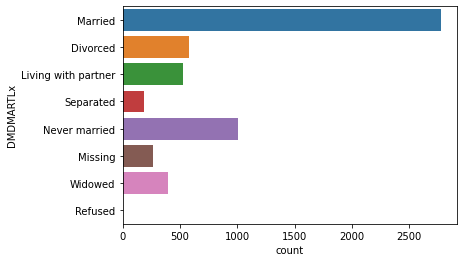

In [9]:
sns.countplot(y=da['DMDMARTLx'])

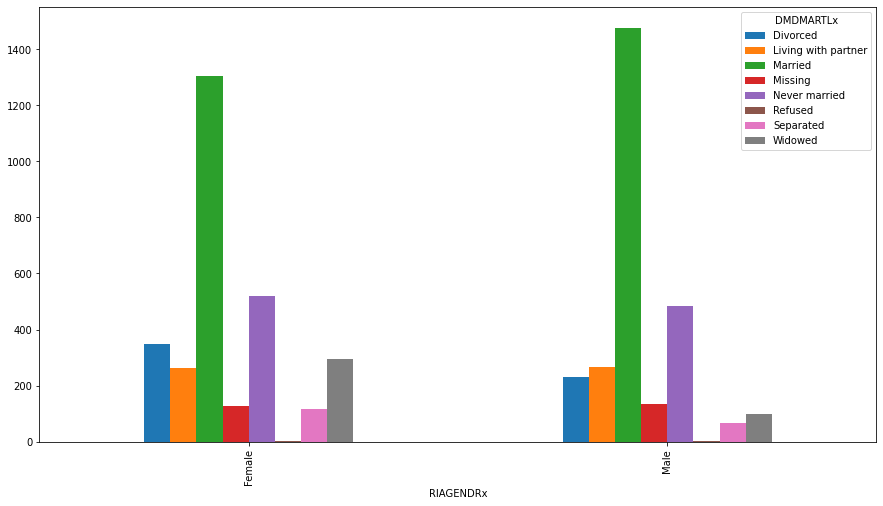

In [10]:
da.groupby(['RIAGENDRx','DMDMARTLx']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

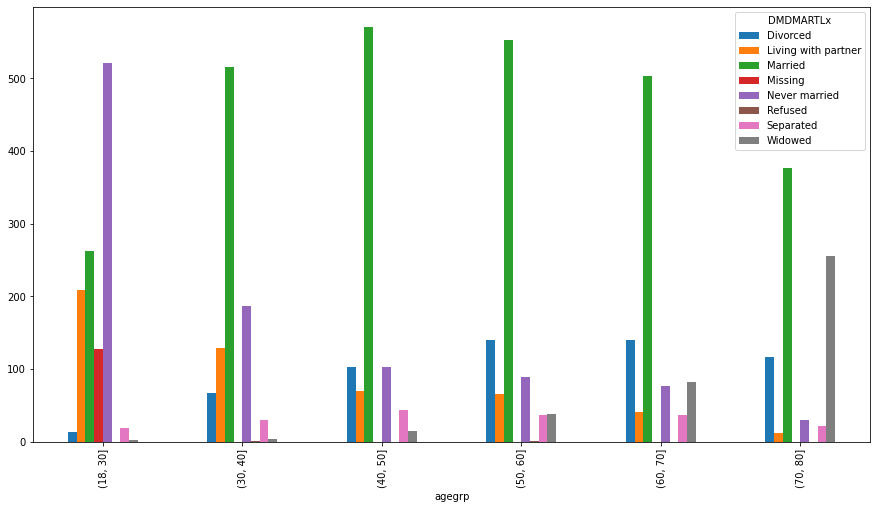

In [11]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

da.groupby(['agegrp', 'DMDMARTLx']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

In [12]:
dx = da.loc[~da['DMDMARTLx'].isin(['Missing']), :]
dx = dx.groupby(['agegrp', 'RIAGENDRx'])['DMDMARTLx']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis = 1)
print(dx.to_string(float_format= "%3f"))

DMDMARTLx           Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp   RIAGENDRx                                                                                    
(18, 30] Female     0.019892             0.206148 0.285714       0.468354      NaN   0.019892      NaN
         Male       0.004237             0.201271 0.220339       0.555085      NaN   0.014831 0.004237
(30, 40] Female     0.090717             0.120253 0.544304       0.204641      NaN   0.035865 0.004219
         Male       0.052402             0.157205 0.563319       0.194323 0.002183   0.026201 0.004367
(40, 50] Female     0.137450             0.073705 0.573705       0.125498      NaN   0.065737 0.023904
         Male       0.084788             0.082294 0.703242       0.097257      NaN   0.027431 0.004988
(50, 60] Female     0.176596             0.068085 0.546809       0.089362 0.002128   0.057447 0.059574
         Male       0.125551             0.074890 0.651982       0.103524

In [13]:
female_df = pd.DataFrame()
female_df = da[da['RIAGENDRx'] == 'Female']

/var/folders/0h/674kd08n4x31w0wzlnb63lr40000gn/T/ipykernel_8004/1181014241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df["agegrp"] = pd.cut(female_df.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80])


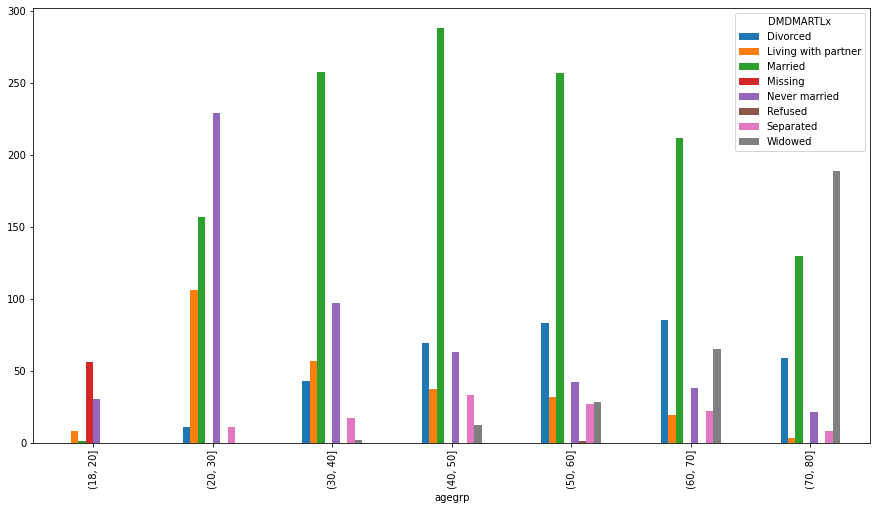

In [14]:
female_df["agegrp"] = pd.cut(female_df.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80])

female_df.groupby(['agegrp', 'DMDMARTLx']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

In [15]:
male_df = pd.DataFrame()
male_df = da[da['RIAGENDRx'] == 'Male']

/var/folders/0h/674kd08n4x31w0wzlnb63lr40000gn/T/ipykernel_8004/621851830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df["agegrp"] = pd.cut(male_df.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80])


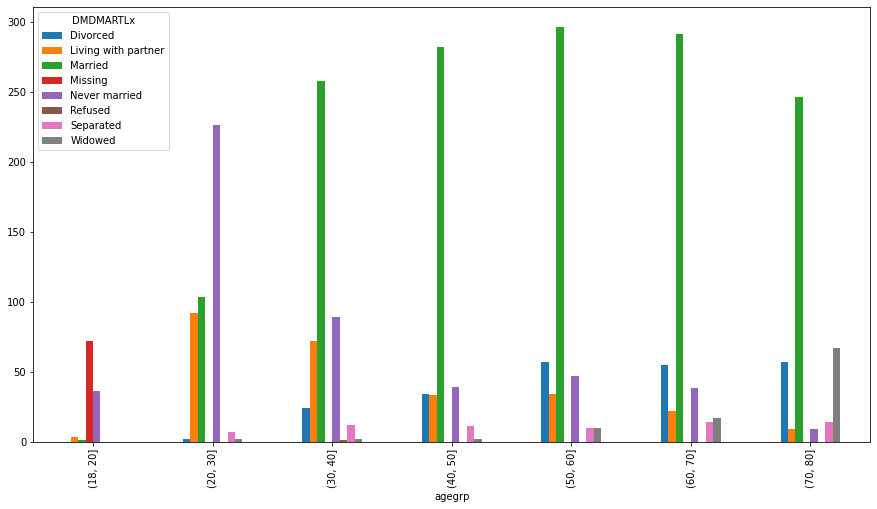

In [16]:
male_df["agegrp"] = pd.cut(male_df.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80])

male_df.groupby(['agegrp', 'DMDMARTLx']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

In [17]:
# selections =  (da.RIDAGEYR <= 40) & (da.RIDAGEYR >= 30)

# freq_all = da.where(selections).MARISTAT.value_counts()
# freq_all

In [18]:
# selections = (da['RIAGENDR'] == 1)
# male = da.where(selections).MARISTAT.value_counts()
# male

In [19]:
# selections = (da['RIAGENDR'] == 1) & (da.RIDAGEYR <= 40) & (da.RIDAGEYR >= 30)

# freq_male = da.where(selections).MARISTAT.value_counts()
# freq_male

In [20]:
# selections = (da['RIAGENDR'] == 2)
# female = da.where(selections).MARISTAT.value_counts()
# female

In [21]:
# selections = (da['RIAGENDR'] == 2) & (da.RIDAGEYR <= 40) & (da.RIDAGEYR >= 30)

# freq_female = da.where(selections).MARISTAT.value_counts()
# freq_female

In [22]:
# # subset the data to include only females
# da = da.where(da.RIAGENDRx == 'Female')

# # cut age into bands no wider than 10 years
# da['agegrp'] = pd.cut(da.RIDAGEYR, [20, 30, 40, 50, 60, 70, 80])

# # Eliminate rare/missing values
# dx = da.loc[~da.DMDMARTLx.isin(["Don't know", "Missing"]), :]  

# # group marital status by age group band
# dx = dx.groupby(["agegrp"])["DMDMARTLx"]

# # obtain the counts for marital status within each age group band
# dx = dx.value_counts()

# dx = dx.unstack() # Restructure the results from 'long' to 'wide'
# dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
# print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

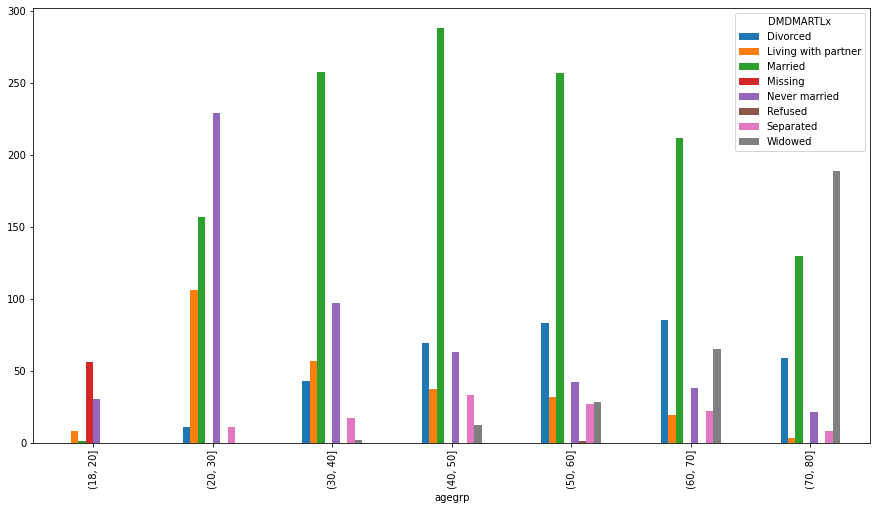

In [23]:
female_df.groupby(['agegrp', 'DMDMARTLx']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

In [24]:
female_dx = female_df.loc[~female_df['DMDMARTLx'].isin(['Missing']), :]
female_dx = female_dx.groupby(['agegrp'])['DMDMARTLx']
female_dx = female_dx.value_counts()
female_dx = female_dx.unstack()
female_dx = female_dx.apply(lambda x: x/x.sum(), axis = 1)
print(female_dx.to_string(float_format= "%3f"))

DMDMARTLx  Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp                                                                                       
(18, 20]        NaN             0.205128 0.025641       0.769231      NaN        NaN      NaN
(20, 30]   0.021401             0.206226 0.305447       0.445525      NaN   0.021401      NaN
(30, 40]   0.090717             0.120253 0.544304       0.204641      NaN   0.035865 0.004219
(40, 50]   0.137450             0.073705 0.573705       0.125498      NaN   0.065737 0.023904
(50, 60]   0.176596             0.068085 0.546809       0.089362 0.002128   0.057447 0.059574
(60, 70]   0.192744             0.043084 0.480726       0.086168      NaN   0.049887 0.147392
(70, 80]   0.143902             0.007317 0.317073       0.051220      NaN   0.019512 0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

In [25]:
# insert your code here
male_dx = male_df.loc[~male_df['DMDMARTLx'].isin(['Missing']), :]
male_dx = male_dx.groupby(['agegrp'])['DMDMARTLx']
male_dx = male_dx.value_counts()
male_dx = male_dx.unstack()
male_dx = male_dx.apply(lambda x: x/x.sum(), axis = 1)
print(male_dx.to_string(float_format= "%3f"))

DMDMARTLx  Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp                                                                                       
(18, 20]        NaN             0.075000 0.025000       0.900000      NaN        NaN      NaN
(20, 30]   0.004630             0.212963 0.238426       0.523148      NaN   0.016204 0.004630
(30, 40]   0.052402             0.157205 0.563319       0.194323 0.002183   0.026201 0.004367
(40, 50]   0.084788             0.082294 0.703242       0.097257      NaN   0.027431 0.004988
(50, 60]   0.125551             0.074890 0.651982       0.103524      NaN   0.022026 0.022026
(60, 70]   0.125858             0.050343 0.665904       0.086957      NaN   0.032037 0.038902
(70, 80]   0.141791             0.022388 0.611940       0.022388      NaN   0.034826 0.166667


__Q2b.__ Repeat the construction for males.

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

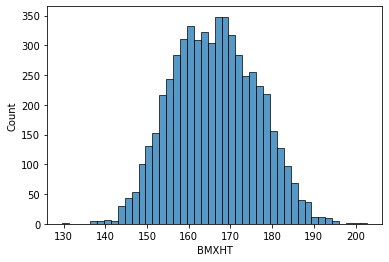

In [26]:
# # insert your code here

bmxht_df = da[da['BMXHT'].isna() == False]
sns.histplot(bmxht_df['BMXHT'])

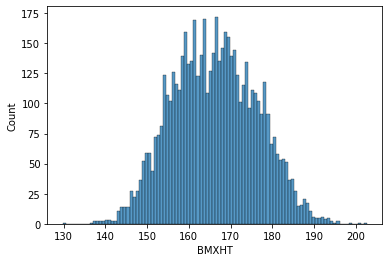

In [27]:
sns.histplot(bmxht_df['BMXHT'], bins = 100)
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

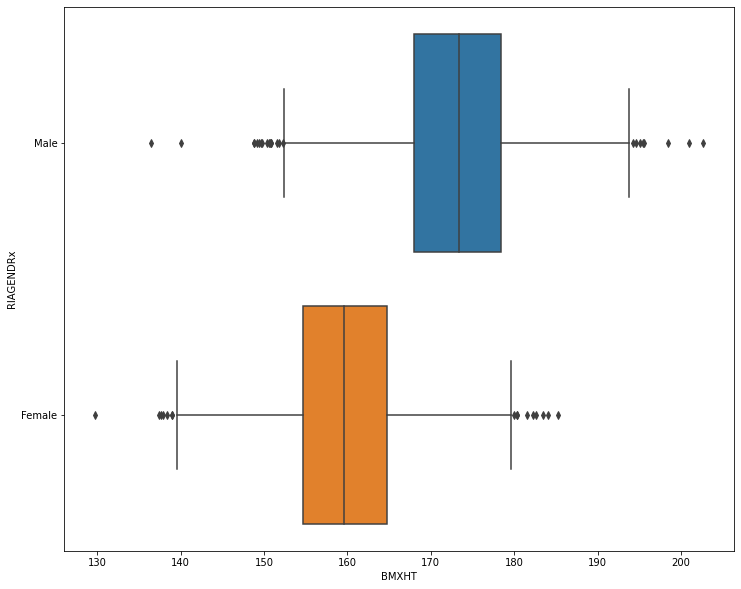

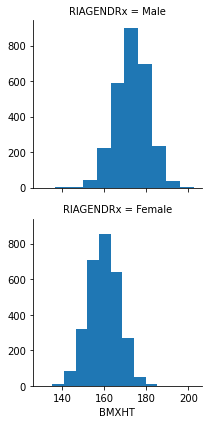

In [28]:
# insert your code here

plt.figure(figsize=(12,10))
sns.boxplot(x = da['BMXHT'], y=da['RIAGENDRx'])

g = sns.FacetGrid(da, row = 'RIAGENDRx')
g = g.map(plt.hist, 'BMXHT')
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [29]:
# insert your code here
da['BPXSY1'].isna().sum()

334

In [30]:
bpsy = pd.DataFrame()
bpsy = da[da['BPXSY1'].isna() == False]

In [31]:
bpsy.dropna(inplace = True)
bpsy.isna().sum().sum()

/var/folders/0h/674kd08n4x31w0wzlnb63lr40000gn/T/ipykernel_8004/3488572297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpsy.dropna(inplace = True)


0

In [32]:
df = bpsy['BPXSY1'] > bpsy['BPXSY2']
df.value_counts()

False    139
True     120
dtype: int64

In [33]:
sy2_sy1 = df[df.iloc[0:] == False]
smaller_sy1 = sy2_sy1.value_counts()
smaller_sy1

False    139
dtype: int64

In [34]:
sy1_sy2 = df[df.iloc[0:] == True]
bigger_sy1 = sy1_sy2.value_counts()
bigger_sy1

True    120
dtype: int64

In [35]:
120/(120+139)

0.46332046332046334

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

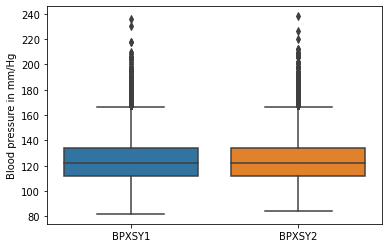

In [36]:
# insert your code here
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [37]:
# insert your code here
no_null_df = da.dropna()
no_null_df.isna().sum().sum()

0

In [38]:
no_null_df['DMDEDUC2'].value_counts()

4.0    91
5.0    85
3.0    49
2.0    18
1.0    16
Name: DMDEDUC2, dtype: int64

In [39]:
no_null_df["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
no_null_df.DMDEDUC2x.value_counts()

/var/folders/0h/674kd08n4x31w0wzlnb63lr40000gn/T/ipykernel_8004/4181658730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_df["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College",


Some college/AA    91
College            85
HS/GED             49
9-11               18
<9                 16
Name: DMDEDUC2x, dtype: int64

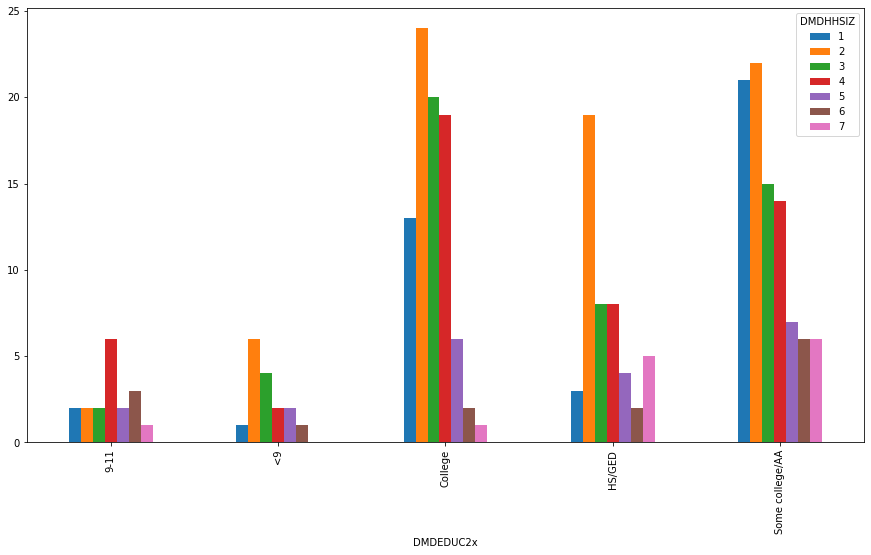

In [40]:
no_null_df.groupby(['DMDEDUC2x', 'DMDHHSIZ']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

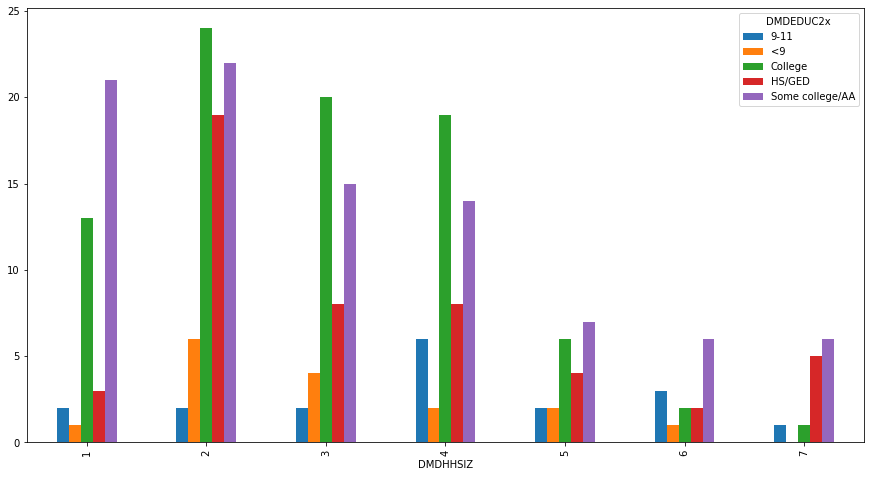

In [41]:
# insert your code here
age_30_40_df = no_null_df.copy()
age_30_40_df["agegrp"] = pd.cut(no_null_df.RIDAGEYR, [30, 40])
age_30_40_df.groupby(['DMDHHSIZ', 'DMDEDUC2x']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

In [42]:
age_30_40_df['DMDHHSIZ'].median()

3.0

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [43]:
# insert your code here

dam = da.where(da.RIAGENDRx == "Male")
daf = da.where(da.RIAGENDRx == "Female")

male_agemax = dam.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].mean().max()
male_agemin = dam.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].mean().min()

print("Male agemax:", male_agemax)
print("Male agemin:", male_agemin)
print("Male ageratio:", male_agemax/male_agemin)

print()

female_agemax = daf.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].mean().max()
female_agemin = daf.groupby(['SDMVPSU', 'SDMVSTRA'])["RIDAGEYR"].mean().min()

print("Female agemax:", female_agemax)
print("Female agemin:", female_agemin)
print("Female ageratio:", female_agemax/female_agemin)

Male agemax: 55.16528925619835
Male agemin: 42.06315789473684
Male ageratio: 1.3114871069416525

Female agemax: 55.63846153846154
Female agemin: 42.541666666666664
Female ageratio: 1.3078580577111432


In [44]:
male_heightmax = dam.groupby(['SDMVPSU', 'SDMVSTRA'])["BMXHT"].mean().max()
male_heightmin = dam.groupby(['SDMVPSU', 'SDMVSTRA'])["BMXHT"].mean().min()

print("Male agemax:", male_heightmax)
print("Male agemin:", male_heightmin)
print("Male ageratio:", male_heightmax/male_heightmin)

print()

female_heightmax = daf.groupby(['SDMVPSU', 'SDMVSTRA'])["BMXHT"].mean().max()
female_heightmin = daf.groupby(['SDMVPSU', 'SDMVSTRA'])["BMXHT"].mean().min()

print("Female agemax:", female_heightmax)
print("Female agemin:", female_heightmin)
print("Female ageratio:", female_heightmax/female_heightmin)

Male agemax: 176.9741573033708
Male agemin: 169.325
Male ageratio: 1.0451744119496282

Female agemax: 162.85352112676057
Female agemin: 155.40204081632652
Female ageratio: 1.047949694040641


In [45]:
male_bmimax = dam.groupby(['SDMVPSU', 'SDMVSTRA'])["BMXBMI"].mean().max()
male_bmimin = dam.groupby(['SDMVPSU', 'SDMVSTRA'])["BMXBMI"].mean().min()

print("Male agemax:", male_bmimax)
print("Male agemin:", male_bmimin)

print()

female_bmimax = daf.groupby(['SDMVPSU', 'SDMVSTRA'])["BMXBMI"].mean().max()
female_bmimin = daf.groupby(['SDMVPSU', 'SDMVSTRA'])["BMXBMI"].mean().min()

print("Female agemax:", female_bmimax)
print("Female agemin:", female_bmimin)
print("Female ageratio:", female_bmimax/female_bmimin)

Male agemax: 31.749000000000002
Male agemin: 25.744444444444444

Female agemax: 32.98412698412698
Female agemin: 26.470967741935485
Female ageratio: 1.2460491548963397


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [46]:
print("\nAGGREGATE IQR")
print("RIDAGEYR IQR: ", iqr(da.RIDAGEYR.dropna()))
print("BMXHT IQR: ", iqr(da.BMXHT.dropna()))
print("BMXBMI IQR: ", iqr(da.BMXBMI.dropna()))

print("\nMALE IQR")
print("RIDAGEYR: ", iqr(da.RIDAGEYR.dropna()[da.RIAGENDRx == 'Male']))
print("BMXHT: ", iqr(da.BMXHT.dropna()[da.RIAGENDRx == 'Male']))
print("BMXBMI: ", iqr(da.BMXBMI.dropna()[da.RIAGENDRx == 'Male']))

print("\nFEMALE IQR")
print("RIDAGEYR: ", iqr(da.RIDAGEYR.dropna()[da.RIAGENDRx == 'Female']))
print("BMXHT: ", iqr(da.BMXHT.dropna()[da.RIAGENDRx == 'Female']))
print("BMXBMI: ", iqr(da.BMXBMI.dropna()[da.RIAGENDRx == 'Female']))

RIDAGEYRGrp = da[da.RIDAGEYR.notna()].groupby(['SDMVSTRA', 'SDMVPSU'])
print("\nRIDAGEYR GROUPED")
print(RIDAGEYRGrp["RIDAGEYR"].agg(iqr))

BMXHTGrp = da[da.BMXHT.notna()].groupby(['SDMVSTRA', 'SDMVPSU'])
print("\nBMXHT GROUPED")
print(BMXHTGrp["BMXHT"].agg(iqr))

BMXBMIGrp = da[da.BMXBMI.notna()].groupby(['SDMVSTRA', 'SDMVPSU'])
print("\nBMXBMI GROUPED")
print(BMXBMIGrp["BMXBMI"].agg(iqr))

print("\nRatio of Max/Min for RIDAGEYR")
print(max(RIDAGEYRGrp["RIDAGEYR"].agg(iqr)) / min(RIDAGEYRGrp["RIDAGEYR"].agg(iqr)))

print("\nRatio of Max/Min for BMXBHT")
print(max(BMXHTGrp["BMXHT"].agg(iqr)) / min(BMXHTGrp["BMXHT"].agg(iqr)))

print("\nRatio of Max/Min for BMXBMI")
print(max(BMXBMIGrp["BMXBMI"].agg(iqr)) / min(BMXBMIGrp["BMXBMI"].agg(iqr)))


AGGREGATE IQR
RIDAGEYR IQR:  31.0
BMXHT IQR:  14.800000000000011
BMXBMI IQR:  8.7

MALE IQR
RIDAGEYR:  31.0
BMXHT:  10.400000000000006
BMXBMI:  7.575000000000003

FEMALE IQR
RIDAGEYR:  30.0
BMXHT:  10.100000000000023
BMXBMI:  10.0

RIDAGEYR GROUPED
SDMVSTRA  SDMVPSU
119       1          31.25
          2          33.00
120       1          26.00
          2          27.00
121       1          31.50
          2          25.00
122       1          27.00
          2          28.75
123       1          30.00
          2          33.00
124       1          30.00
          2          26.00
125       1          29.50
          2          33.75
126       1          33.00
          2          32.50
127       1          29.00
          2          27.75
128       1          30.00
          2          24.00
129       1          22.25
          2          28.75
130       1          35.25
          2          29.00
131       1          36.00
          2          27.00
132       1          25.00
   

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.